# A Medical History of British India

This example is based on the dataset ['A Medical History of British India'](https://data.nls.uk/data/digitised-collections/a-medical-history-of-british-india/) provided by the [Data Foundry](https://data.nls.uk). It uses the "Just the text" version of the dataset (34.7 MB compressed). This dataset is part of the India Papers collection held by the Library.

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import string

[nltk_data] Downloading package punkt to /home/gustavo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gustavo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
from nltk.tokenize import word_tokenize
f = open("../input/nls-text-indiaPapers/74463060.txt", "r")
text = f.read()
text_tokens = word_tokenize(text)

### Let's remove non relevant words

In [11]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

### We can improve the stopwords list with our own words

In [49]:
stop_words = stopwords.words('english')
print(len(stop_words))
stop_words = stopwords.words('english') + list(string.punctuation)
print(len(stop_words))
stop_words.extend(['...', ',,','1','2','3','4','5','6','7','8','9','``','\'\'','10'])
stop_words.extend(['also', 'one','per','one','two','three'])
print(len(stop_words))

198
230
249


In [50]:
filtered_words = [word.lower() for word in text_tokens if word.lower() not in stop_words]
print(filtered_words)

['leprosy', 'india', 'report', 'leprosy', 'commission', 'india', '1890-91', 'leprosy', 'india', 'report', 'leprosy', 'commission', 'india', '1890-91', 'calcutta', 'printed', 'superintendent', 'government', 'printing', 'india', '1893', 'calcutta', 'government', 'india', 'central', 'printing', 'office', 'hastings', 'street', 'memoriam', 'arthur', 'barclay', 'died', 'simla', 'august', '2nd', '1891', 'deep', 'regret', 'colleagues', 'take', 'opportunity', 'express', 'sense', 'great', 'loss', 'sustained', 'death', 'friend', 'fellow-worker', 'national', 'leprosy', 'fund', 'president', 'committee', 'h.r.h', 'prince', 'wales', 'k.g', 'general', 'committee', 'archbishop', 'canterbury', 'duke', 'norfolk', 'k.g', 'duke', 'westminster', 'k.g', 'duke', 'devonshire', 'k.g', 'marquis', 'dufferin', 'ava', 'k.p.', 'g.c.b.', 'g.c', 'm.g', 'earl', 'rosebery', 'lord', 'randolph', 's.', 'churchill', 'm.p', 'baron', 'ferdinand', 'de', 'rothschild', 'm.p', 'bishop', 'london', 'cardinal', 'vaughan', 'hon', 'g.

### We can compute the frequency distribution

A frequency distribution records the number of times each outcome of an experiment has occurred. For example, a frequency distribution could be used to record the frequency of each word type in a document.

In [51]:
fdist = FreqDist(filtered_words)
print(fdist)

<FreqDist with 12595 samples and 76334 outcomes>


In [52]:
fdist.most_common(30)

[('leprosy', 1327),
 ('lepers', 677),
 ('total', 606),
 ('disease', 470),
 ('leper', 442),
 ('bacilli', 432),
 ('report', 349),
 ('cases', 346),
 ('population', 330),
 ('years', 319),
 ('commission', 318),
 ('number', 307),
 ('may', 295),
 ('asylum', 286),
 ('india', 285),
 ('table', 270),
 ('children', 220),
 ('census', 220),
 ('found', 205),
 ('case', 204),
 ('must', 189),
 ('remarks', 185),
 ('three', 185),
 ('bacillus', 185),
 ('treatment', 166),
 ('time', 164),
 ('seen', 162),
 ('healthy', 158),
 ('10,000', 154),
 ('oil', 146)]

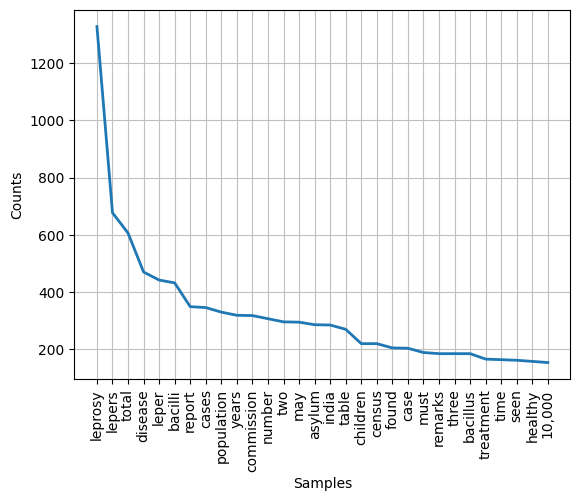

In [48]:
# Frequency Distribution Plot
fdist.plot(30)
plt.show()

### Let's try to identify named entities in the text

We load a pretrained model provided by the library spacy

In [9]:
import spacy
!python -m spacy download en_core_web_sm
 
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 596.8 kB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached pydantic_core-2.14.6-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.5 kB)
Using cached pydantic_core-2.14.6-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.16.3
    Uninstalling pydantic_core-2.16.3:
      Successfully uninstalled pydantic_core-2.16.3
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


### Now let's see how it works with the 10 first sentences

In [20]:
sentences = sent_tokenize(text)

for s in range(0, 10):
    statement = nlp(sentences[s])
    for ent in statement.ents:
        print(ent.label_ + " " + ent.text)

GPE INDIA
GPE INDIA
DATE 1890-91
GPE INDIA
GPE IN  INDIA
DATE 1890-91
GPE INDIA
DATE 1893
DATE 8
ORG Memoriam ARTHUR BARCLAY
PERSON Simla
DATE August the 2nd, 1891
ORG Friend
GPE Fellow
ORG THE NATIONAL LEPROSY FUND
